# **SOLUCION EJERCICIO 1 - EXAMEN Ai Lab School**

Se vincula con la cuenta de Gmail para poder obtener la informacion de la base de datos





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se importan las bibliotecas y frameworks necesarios


In [ ]:
import random, os, shutil
import cv2
import numpy as np
import PIL
import math
from zipfile import ZipFile

## **INFORMACIÓN SOBRE LA BASE DE DATOS:**
1.   **face 01:**
  *   Sin Objetos: 0001 - 0073
  *   Con objetos: 0074 - 0227
2.   **face 02:**
      *DESCARTADA* - Imagenes sin objetos
3.   **face 03:**
  *   Sin Objetos: 0001 - 0359
  *   Con objetos: 0360 - 0592
4.   **face 04:**
  *   Sin Objetos: 0001 - 0180
  *   Con objetos: 0181 - 0487
5.   **face 05:**
      *DESCARTADA* - Carpeta vacia
6.   **face 06:**
      *DESCARTADA* - Carpeta vacia
7.   **face 07:**
  *   Sin Objetos: 0001 - 0700
  *   Con objetos: 0701 - 1297
8.   **face 08:**
  *   Sin Objetos: 0001 - 0459 
  *   Con objetos: 0460 - 0857
9.   **face 09:**
  *   Sin Objetos: 0001 - 0664
  *   Con objetos: 0665 - 1117
10.  **face 10:**
      *DESCARTADA* - Imagenes sin objetos
11.  **face 11:**
  *   Sin Objetos: 0001 - 0286
  *   Con objetos: 0287 - 0434
12.  **face 12:**
  *   Sin Objetos: 0001 - 0725
  *   Con objetos: 0726 - 2179
13.  **face 13:**
  *   Sin Objetos: 0001 - 0465
  *   Con objetos: 0466 - 1417
14.  **face 14:**
  *   Sin Objetos: 0001 - 0354
  *   Con objetos: 0355 - 1482
15.  **face 15:**
  *   Sin Objetos: 00001 - 00196
  *   Con objetos: 00197 - 01125
16.  **face 16:**
  *   Sin Objetos: 0001 - 0217
  *   Con objetos: 0218 - 1611
17.  **face 17:**
  *   Sin Objetos: 0001 - 1294
  *   Con objetos: 1295 - 2632
18.  **face 18:**
  *   Sin Objetos: 0001 - 1036
  *   Con objetos: 1037 - 2215
19.  **face 19:**
  *   Sin Objetos: 0001 - 1136
  *   Con objetos: 1137 - 2539
20.  **face 20:**
  *   Sin Objetos: 0001 - 0619
  *   Con objetos: 0620 - 1670










La base de datos y cada clase viene en formato Zip, por lo que se requiere descomprimir.

**NOTA**: La carpeta **2, 5, 6 y 10** se descartan por no cumplir los parametros necesarios


In [ ]:
from zipfile import ZipFile                     # Importacion del framework necesario
cont = 0
for i in range(1,21):
  if i < 10 and i !=2 and i != 5 and i != 6:    # La carpeta 2, 5 y 6 estan descartadas 
    file_name = '/content/drive/My Drive/Colab Notebooks/Ai Lab School/EXAMEN/EJERCICIO 1/Terravic_Facial_IR_Database/Copia de face0{}.zip'.format(i)
  elif i >= 10 and i != 10:                     # La carpeta 10 esta descartada
    file_name = '/content/drive/My Drive/Colab Notebooks/Ai Lab School/EXAMEN/EJERCICIO 1/Terravic_Facial_IR_Database/Copia de face{}.zip'.format(i)
  with ZipFile(file_name, 'r') as zip: 
    zip.extractall('Terravic_Original') 
# Los archivos se deben encontrar en la carpeta del lado izquierdo

Renombramos las carpetas restantes para tener un orden en las clases, considerando que 4 clases fueron extraidas.

In [ ]:
import os
for i in range(1,21):
  if i >= 3 and i <= 4:
    os.rename('Terravic_Original/face0{}'.format(i), 'Terravic_Original/face0{}'.format(i - 1))
  elif i >= 7 and i <= 9:
    os.rename('Terravic_Original/face0{}'.format(i), 'Terravic_Original/face0{}'.format(i - 3))
  elif i >= 11 and i <= 13:
    os.rename('Terravic_Original/face{}'.format(i), 'Terravic_Original/face0{}'.format(i - 4))
  elif i >= 14:
    os.rename('Terravic_Original/face{}'.format(i), 'Terravic_Original/face{}'.format(i - 4))

## **INFORMACIÓN SOBRE LA NUEVA DISTRIBUCION:**
1.   **face 01:**
  *   Sin Objetos: 0001 - 0073
  *   Con objetos: 0074 - 0227
2.   **face 02:**
  *   Sin Objetos: 0001 - 0359
  *   Con objetos: 0360 - 0592
3.   **face 03:**
  *   Sin Objetos: 0001 - 0180
  *   Con objetos: 0181 - 0487
4.   **face 04:**
  *   Sin Objetos: 0001 - 0700
  *   Con objetos: 0701 - 1297
5.   **face 05:**
  *   Sin Objetos: 0001 - 0459 
  *   Con objetos: 0460 - 0857
6.   **face 06:**
  *   Sin Objetos: 0001 - 0664
  *   Con objetos: 0665 - 1117
7.   **face 07:**
  *   Sin Objetos: 0001 - 0286
  *   Con objetos: 0287 - 0434
8.   **face 08:**
  *   Sin Objetos: 0001 - 0725
  *   Con objetos: 0726 - 2179
9.   **face 09:**
  *   Sin Objetos: 0001 - 0465
  *   Con objetos: 0466 - 1417
10.  **face 10:**
  *   Sin Objetos: 0001 - 0354
  *   Con objetos: 0355 - 1482
11.  **face 11:**
  *   Sin Objetos: 00001 - 00196
  *   Con objetos: 00197 - 01125
12.  **face 12:**
  *   Sin Objetos: 0001 - 0217
  *   Con objetos: 0218 - 1611
13.  **face 13:**
  *   Sin Objetos: 0001 - 1294
  *   Con objetos: 1295 - 2632
14.  **face 14:**
  *   Sin Objetos: 0001 - 1036
  *   Con objetos: 1037 - 2215
15.  **face 15:**
  *   Sin Objetos: 0001 - 1136
  *   Con objetos: 1137 - 2539
16.  **face 16:**
  *   Sin Objetos: 0001 - 0619
  *   Con objetos: 0620 - 1670


Creamos 2 nuevas carpetas para almacenar los conjuntos de imagenes
1.   **Terravic_Train**: Carpeta que va a contener cada clase, y dentro de cada clase, las posibles imagenes para entrenar el modelo, es decir, todas las imagenes donde aparezca la persona sin ningun objeto.  
2.   **Terravic_Test**: Carpeta que va a contener cada clase, y dentro de cada clase, las posibles imagenes para probar el modelo, es decir, todas las imagenes donde aparezca la persona con algun tipo de objeto.  



In [ ]:
os.mkdir('Terravic_Train')
os.mkdir('Terravic_Test')

Se crean las subcarpetas correspondientes a cada persona en las carpetas recien creadas

In [ ]:
for i in range(1,17):
  if i < 10: 
    dest_train = 'Terravic_Train/face0{}/'.format(i)
    dest_train_1 = 'Terravic_Test/face0{}/'.format(i)
  elif i >= 10:
    dest_train = 'Terravic_Train/face{}/'.format(i)
    dest_train_1 = 'Terravic_Test/face{}/'.format(i)

  os.mkdir(dest_train)
  os.mkdir(dest_train_1)

Se definen 2 funciones:

**1._ def train():** Función que permite almacenar imagenes en la carpeta Terravic_Train (conjunto de entrenamiento)

**2._ def test():** Función que permite almacenar imagenes en la carpeta Terravic_Test (conjunto de prueba/validacion)

In [ ]:
def train(f, sample):
  if f < 10:
    if sample < 10:
      cv2.imwrite('Terravic_Train/face0{}/000{}.jpg'.format(f,sample), img_person)
    elif sample >= 10 and sample < 100:
      cv2.imwrite('Terravic_Train/face0{}/00{}.jpg'.format(f,sample), img_person)
    elif sample >= 100 and sample < 1000:
      cv2.imwrite('Terravic_Train/face0{}/0{}.jpg'.format(f,sample), img_person)
    else:
      cv2.imwrite('Terravic_Train/face0{}/{}.jpg'.format(f,sample), img_person)
  else:
    if sample < 10:
      cv2.imwrite('Terravic_Train/face{}/000{}.jpg'.format(f,sample), img_person)
    elif sample >= 10 and sample < 100:
      cv2.imwrite('Terravic_Train/face{}/00{}.jpg'.format(f,sample), img_person)
    elif sample >= 100 and sample < 1000:
      cv2.imwrite('Terravic_Train/face{}/0{}.jpg'.format(f,sample), img_person)
    else:
      cv2.imwrite('Terravic_Train/face{}/{}.jpg'.format(f,sample), img_person)

def test(f, sample):
  if f < 10:
    if sample < 10:
      cv2.imwrite('Terravic_Test/face0{}/000{}.jpg'.format(f,sample), img_person)
    elif sample >= 10 and sample < 100:
      cv2.imwrite('Terravic_Test/face0{}/00{}.jpg'.format(f,sample), img_person)
    elif sample >= 100 and sample < 1000:
      cv2.imwrite('Terravic_Test/face0{}/0{}.jpg'.format(f,sample), img_person)
    else:
      cv2.imwrite('Terravic_Test/face0{}/{}.jpg'.format(f,sample), img_person)
  else:
    if sample < 10:
      cv2.imwrite('Terravic_Test/face{}/000{}.jpg'.format(f,sample), img_person)
    elif sample >= 10 and sample < 100:
      cv2.imwrite('Terravic_Test/face{}/00{}.jpg'.format(f,sample), img_person)
    elif sample >= 100 and sample < 1000:
      cv2.imwrite('Terravic_Test/face{}/0{}.jpg'.format(f,sample), img_person)
    else:
      cv2.imwrite('Terravic_Test/face{}/{}.jpg'.format(f,sample), img_person)

**1._** Se itera sobre la carpeta original Terravic_Original para obtener todas las imagenes

**2._** Dependiendo de la clase, se limita el almacenamiento de imagenes con base al criterio: persona con objetos y persona sin objetos (los limites frontera se obtuvieron de forma manual, visualizando sobre cada clase).

In [ ]:
# Iterar en la base de datos original, procesar carpeta por carpeta.
for index_class in range(1,17): 
  sample = 1
  if index_class < 10: 
    class_path = 'Terravic_Original/face0{}/'.format(index_class)
  elif index_class >= 10:
    class_path = 'Terravic_Original/face{}/'.format(index_class)

  # Extracción de las imágenes correspondientes a cada individuo y ordenados
  lst = sorted(os.listdir(class_path))

  # Cargar las imagenes en las nuevas carpetas (Terravic_Train y Terravic_Test)
  for file_name in lst:
    img_person = cv2.imread(class_path + file_name)
    if class_path == 'Terravic_Original/face01/':    # Persona 1
      if sample < 74:                                # Rango Persona 1 SIN objetos 
        train(1, sample)
        sample += 1
      else:                                          # Rango Persona 2 CON objetos
        test(1, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face02/':    # Persona 2
      if sample < 360:                                 # Rango Persona 2 SIN objetos 
        train(2, sample)
        sample += 1
      else:                                            # Rango Persona 2 CON objetos
        test(2, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face03/':    # Persona 3
      if sample < 181:                                 # Rango Persona 3 SIN objetos 
        train(3, sample)
        sample += 1
      else:                                            # Rango Persona 3 CON objetos
        test(3, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face04/':    # Persona 4
      if sample < 701:                                 # Rango Persona 4 SIN objetos 
        train(4, sample)
        sample += 1
      else:                                            # Rango Persona 4 CON objetos
        test(4, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face05/':    # Persona 5
      if sample < 460:                                 # Rango Persona 5 SIN objetos 
        train(5, sample)
        sample += 1
      else:                                            # Rango Persona 5 CON objetos
        test(5, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face06/':    # Persona 6
      if sample < 665:                                 # Rango Persona 6 SIN objetos 
        train(6, sample)
        sample += 1
      else:                                            # Rango Persona 6 CON objetos
        test(6, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face07/':    # Persona 7
      if sample < 287:                                 # Rango Persona 7 SIN objetos 
        train(7, sample)
        sample += 1
      else:                                          # Rango Persona 7 CON objetos
        test(7, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face08/':    # Persona 8
      if sample < 726:                                 # Rango Persona 8 SIN objetos 
        train(8, sample)
        sample += 1
      else:                                            # Rango Persona 8 CON objetos
        test(8, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face09/':    # Persona 9
      if sample < 466:                                 # Rango Persona 9 SIN objetos 
        train(9, sample)
        sample += 1
      else:                                            # Rango Persona 9 CON objetos
        test(9, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face10/':    # Persona 10
      if sample < 355:                                 # Rango Persona 10 SIN objetos 
        train(10, sample)
        sample += 1
      else:                                            # Rango Persona 10 CON objetos
        test(10, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face11/':    # Persona 11
      if sample < 197:                                 # Rango Persona 11 SIN objetos 
        train(11, sample)
        sample += 1
      else:                                            # Rango Persona 11 CON objetos
        test(11, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face12/':    # Persona 12
      if sample < 218:                                 # Rango Persona 12 SIN objetos 
        train(12, sample)
        sample += 1
      else:                                            # Rango Persona 12 CON objetos
        test(12, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face13/':    # Persona 13
      if sample < 1295:                                # Rango Persona 13 SIN objetos 
        train(13, sample)
        sample += 1
      else:                                            # Rango Persona 13 CON objetos
        test(13, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face14/':    # Persona 14
      if sample < 1037:                                # Rango Persona 14 SIN objetos 
        train(14, sample)
        sample += 1
      else:                                            # Rango Persona 14 CON objetos
        test(14, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face15/':    # Persona 15
      if sample < 1137:                                # Rango Persona 15 SIN objetos 
        train(15, sample)
        sample += 1
      else:                                            # Rango Persona 15 CON objetos
        test(15, sample)
        sample += 1
    elif class_path == 'Terravic_Original/face16/':    # Persona 16
      if sample < 620:                                 # Rango Persona 16 SIN objetos 
        train(16, sample)
        sample += 1
      else:                                            # Rango Persona 16 CON objetos
        test(16, sample)
        sample += 1

Se generan 2 nuevas carpetas:

**1._ Terravic_Train_Shuffled:** Carpeta donde se almacenarán las imagenes de cada clase sin ningun tipo de objeto y ademas, serán almacenadas de forma aleatoria.


**2._ Terravic_Test_Shuffled:**  Carpeta donde se almacenarán las imagenes de cada clase con algun tipo de objeto y ademas, serán almacenadas de forma aleatoria.

In [ ]:
os.mkdir('Terravic_Train_Shuffled')
os.mkdir('Terravic_Test_Shuffled')

Se crean las subcarpetas correspondientes a cada persona en las carpetas recien creadas

In [ ]:
for i in range(1,17):
  if i < 10: 
    dest_train_3 = 'Terravic_Train_Shuffled/person0{}/'.format(i)
    dest_train_4 = 'Terravic_Test_Shuffled/person0{}/'.format(i)
  elif i >= 10:
    dest_train_3 = 'Terravic_Train_Shuffled/person{}/'.format(i)
    dest_train_4 = 'Terravic_Test_Shuffled/person{}/'.format(i)
  os.mkdir(dest_train_3)
  os.mkdir(dest_train_4)

Cargar, de forma aleatoria las posibles imagenes a utilizar en el conjunto de entrenamiento, es decir, las imagenes de cada clase sin ningun tipo de objeto. 

In [ ]:
# Iterar en la base de datos Terravic_Train, procesar carpeta por carpeta.
for index_class in range(1,17): 
  sample = 0
  if index_class < 10: 
    class_path = 'Terravic_Train/face0{}/'.format(index_class)
  elif index_class >= 10:
    class_path = 'Terravic_Train/face{}/'.format(index_class)

  # Extracción de las imágenes correspondientes a cada individuo y ordenados
  lst = sorted(os.listdir(class_path))

  # Organizar las imagenes de forma aleatoria
  random.shuffle(lst)

  # Cargar las imagenes aleatorias en la nueva carpeta 
  for file_name in lst:
    img_person = cv2.imread(class_path + file_name)
    if index_class < 10:
      if sample < 10:                                                     
        cv2.imwrite('Terravic_Train_Shuffled/person0{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        cv2.imwrite('Terravic_Train_Shuffled/person0{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        cv2.imwrite('Terravic_Train_Shuffled/person0{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        cv2.imwrite('Terravic_Train_Shuffled/person0{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

    else:
      if sample < 10:
        cv2.imwrite('Terravic_Train_Shuffled/person{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        cv2.imwrite('Terravic_Train_Shuffled/person{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        cv2.imwrite('Terravic_Train_Shuffled/person{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        cv2.imwrite('Terravic_Train_Shuffled/person{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

Cargar, de forma aleatoria las posibles imagenes a utilizar en el conjunto de prueba/entrenamiento, es decir, las imagenes de cada clase con algún tipo de objeto. 

In [ ]:
# Iterar en la base de datos Terravic_Train, procesar carpeta por carpeta.
for index_class in range(1,17): 
  sample = 0
  if index_class < 10: 
    class_path = 'Terravic_Test/face0{}/'.format(index_class)
  elif index_class >= 10:
    class_path = 'Terravic_Test/face{}/'.format(index_class)

  # Extracción de las imágenes correspondientes a cada individuo y ordenados
  lst = sorted(os.listdir(class_path))

  # Organizar las imagenes de forma aleatoria
  random.shuffle(lst)

  # Cargar las imagenes aleatorias en la nueva carpeta 
  for file_name in lst:
    img_person = cv2.imread(class_path + file_name)
    if index_class < 10:
      if sample < 10:                                                     
        cv2.imwrite('Terravic_Test_Shuffled/person0{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        cv2.imwrite('Terravic_Test_Shuffled/person0{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        cv2.imwrite('Terravic_Test_Shuffled/person0{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        cv2.imwrite('Terravic_Test_Shuffled/person0{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

    else:
      if sample < 10:
        cv2.imwrite('Terravic_Test_Shuffled/person{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        cv2.imwrite('Terravic_Test_Shuffled/person{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        cv2.imwrite('Terravic_Test_Shuffled/person{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        cv2.imwrite('Terravic_Test_Shuffled/person{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

Creacion de las carpetas de entrenamiento, validacion y prueba con sus respectivas carpetas para cada individuo

In [ ]:
datasets = ['train', 'validation', 'test']
for dataset_name in datasets:
  os.mkdir(dataset_name)
  for i in range(1, 17):
    if i < 10:
      dest_train = dataset_name+'/person0{}/'.format(i)
    elif i >= 10:
      dest_train = dataset_name+'/person{}/'.format(i)
    os.mkdir(dest_train)

Asignacion de 73 imagenes al conjunto de entrenamiento

In [ ]:
for i in range(1, 17):
  if i < 10:
    src_path = 'Terravic_Train_Shuffled/person0{}/'.format(i)
    dest_path = 'train/person0{}/'.format(i)
  else:
    src_path = 'Terravic_Train_Shuffled/person{}/'.format(i)
    dest_path = 'train/person{}/'.format(i)

  lst = sorted(os.listdir(src_path))
  cont = 0
  limit = 73
  
  for file_name in lst:
    if cont < limit:
      img_original = cv2.imread(src_path + file_name)
      if cont < 10:
        cv2.imwrite(dest_path + '000{}.jpg'.format(cont), img_original)
      elif cont >= 10 and cont < 100:
        cv2.imwrite(dest_path + '00{}.jpg'.format(cont), img_original)
      elif cont >= 100 and cont < 1000: 
        cv2.imwrite(dest_path + '0{}.jpg'.format(cont), img_original)
      else: 
        cv2.imwrite(dest_path + '{}.jpg'.format(cont), img_original)
            
      cont = cont + 1

Comprobacion del conjunto de entrenamiento

In [ ]:
import os
for i in range(1,17):
  if i < 10:
    print('total  images in train/person0{}:'.format(i), len(os.listdir('train/person0{}/'.format(i))))
  else:
    print('total  images in train/person{}:'.format(i), len(os.listdir('train/person{}/'.format(i))))

total  images in train/person01: 73
total  images in train/person02: 73
total  images in train/person03: 73
total  images in train/person04: 73
total  images in train/person05: 73
total  images in train/person06: 73
total  images in train/person07: 73
total  images in train/person08: 73
total  images in train/person09: 73
total  images in train/person10: 73
total  images in train/person11: 73
total  images in train/person12: 73
total  images in train/person13: 73
total  images in train/person14: 73
total  images in train/person15: 73
total  images in train/person16: 73


Asignacion de imagenes al conjunto de validacion/prueba

In [ ]:
for i in range(1, 17):
  if i < 10:
    src_path = 'Terravic_Test_Shuffled/person0{}/'.format(i)
    dest_path = 'validation/person0{}/'.format(i)
    dest_path_1 = 'test/person0{}/'.format(i)
  else:
    src_path = 'Terravic_Test_Shuffled/person{}/'.format(i)
    dest_path = 'validation/person{}/'.format(i)
    dest_path_1 = 'test/person{}/'.format(i)

  lst = sorted(os.listdir(src_path))
  cont = 0
  limit = math.ceil(len(lst))/2

  for file_name in lst:
    img_original = cv2.imread(src_path + file_name)
    if cont < limit:
      if cont < 10:
        cv2.imwrite(dest_path + '000{}.jpg'.format(cont), img_original)
      elif cont >= 10 and cont < 100:
        cv2.imwrite(dest_path + '00{}.jpg'.format(cont), img_original)
      elif cont >= 100 and cont < 1000: 
        cv2.imwrite(dest_path + '0{}.jpg'.format(cont), img_original)
      else: 
        cv2.imwrite(dest_path + '{}.jpg'.format(cont), img_original)
      cont = cont + 1
    else:
      if cont < 10:
        cv2.imwrite(dest_path_1 + '000{}.jpg'.format(cont), img_original)
      elif cont >= 10 and cont < 100:
        cv2.imwrite(dest_path_1 + '00{}.jpg'.format(cont), img_original)
      elif cont >= 100 and cont < 1000: 
        cv2.imwrite(dest_path_1 + '0{}.jpg'.format(cont), img_original)
      else: 
        cv2.imwrite(dest_path_1 + '{}.jpg'.format(cont), img_original)
      cont = cont + 1

Comprobacion del conjunto de entrenamiento y prueba

In [ ]:
import os
for i in range(1,17):
  if i < 10:
    print('total  images in validation/person0{}:'.format(i), len(os.listdir('validation/person0{}/'.format(i))))
    print('total  images in test/person0{}:'.format(i), len(os.listdir('test/person0{}/'.format(i))))
  else:
    print('total  images in validation/person{}:'.format(i), len(os.listdir('validation/person{}/'.format(i))))
    print('total  images in test/person{}:'.format(i), len(os.listdir('test/person{}/'.format(i))))

total  images in validation/person01: 77
total  images in test/person01: 77
total  images in validation/person02: 117
total  images in test/person02: 116
total  images in validation/person03: 154
total  images in test/person03: 153
total  images in validation/person04: 299
total  images in test/person04: 298
total  images in validation/person05: 199
total  images in test/person05: 199
total  images in validation/person06: 227
total  images in test/person06: 226
total  images in validation/person07: 74
total  images in test/person07: 74
total  images in validation/person08: 727
total  images in test/person08: 727
total  images in validation/person09: 476
total  images in test/person09: 476
total  images in validation/person10: 564
total  images in test/person10: 564
total  images in validation/person11: 465
total  images in test/person11: 464
total  images in validation/person12: 697
total  images in test/person12: 697
total  images in validation/person13: 669
total  images in test/pers

_______________________________________________________________________________
# **MODELO DE VISION COMPUTACIONAL**

Referenciamos los conjuntos de entrenamiento, validación y prueba


In [ ]:
train_dir = os.path.join('train')
validation_dir = os.path.join('validation')
test_dir = os.path.join('test')

Se utiliza transferencia de aprendizaje y se carga de la arquitectura VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',   # Se cargan los pesos de la arquitectura
                  include_top=False,    # Se escluye la ultima capa, en este caso, son 16 clases
                  input_shape=(100, 100, 3)) # input_shape = (largo, ancho, canales) 72, 96
conv_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
______________________________________________________________

Congelamos y descongelamos determinadas capas de la arquitectura VGG16

In [ ]:
for layer in conv_base.layers:
    if layer.name[:6] == 'block5': 
      layer.trainable = True
    else:
      layer.trainable = False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

Se propone un modelo de red neuronal convolucional

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization()) # Normaliza los pesos para ayudar el entrenamiento del modelo  
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 512)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 1, 512)         2048      
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                8208      
Total params: 14,724,944
Trainable params: 7,088,656
Non-trainable params: 7,636,288
_________________________________________________________________


Compilación y se definen las métricas para el modelo

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),   # Learning Rate - Cambio en los pesos, con valor pequeño, se modera el cambio de los pesos
              metrics=['acc']) #'acc' -> accuracy -> precisión

Se normalizan las imagenes, asi como, se definen los generadores

In [ ]:
# Se utiliza ImageDataGenerator para leer las imagenes de los directorios
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalizar las imagenes
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100, 100), 
        batch_size= 9,    # lote de imagenes
        color_mode='rgb',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 1168 images belonging to 16 classes.
Found 6563 images belonging to 16 classes.


## **Etapa de entrenamiento y validación (Datos Entrenamiento y Datos Validación)**

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=80, 
      epochs= 10,
      validation_data=validation_generator,
      validation_steps=900)

Epoch 1/10
80/80 [==============================] - 110s 1s/step - loss: 0.0480 - acc: 0.9958 - val_loss: 0.4571 - val_acc: 0.8356
Epoch 2/10
80/80 [==============================] - 109s 1s/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.2091 - val_acc: 0.9233
Epoch 3/10
80/80 [==============================] - 110s 1s/step - loss: 1.9444e-04 - acc: 1.0000 - val_loss: 0.2956 - val_acc: 0.9156
Epoch 4/10
80/80 [==============================] - 109s 1s/step - loss: 3.0610e-05 - acc: 1.0000 - val_loss: 0.1680 - val_acc: 0.9289
Epoch 5/10
80/80 [==============================] - 110s 1s/step - loss: 4.3170e-05 - acc: 1.0000 - val_loss: 0.1223 - val_acc: 0.9478
Epoch 6/10
80/80 [==============================] - 106s 1s/step - loss: 8.8515e-06 - acc: 1.0000 - val_loss: 0.0459 - val_acc: 0.9922
Epoch 7/10
80/80 [==============================] - 112s 1s/step - loss: 3.4797e-06 - acc: 1.0000 - val_loss: 0.1237 - val_acc: 0.9667
Epoch 8/10
80/80 [==============================] - 112s 1s/ste

## **Curvas de precisión y pérdida**

Mejor época (exactitud)  6
Mejor época (pérdida)  6


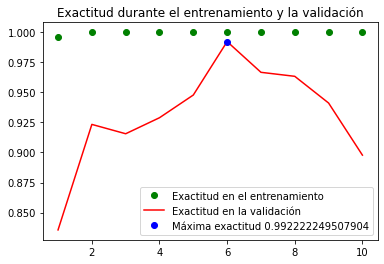

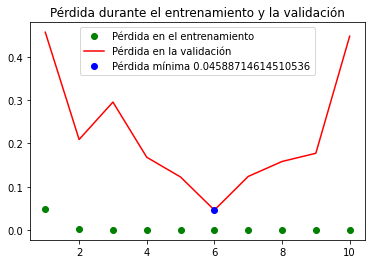

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'go', label='Exactitud en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Exactitud en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Máxima exactitud {}'.format(max_val_acc))
plt.title('Exactitud durante el entrenamiento y la validación')
plt.legend()
print('Mejor época (exactitud) ', max_val_acc_epoch)

plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Pérdida mínima {}'.format(min_val_loss))
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print('Mejor época (pérdida) ', min_val_loss_epoch)

plt.show()

## **Re-entrenamiento del modelo (Datos Entrenamiento y Datos Prueba)**

In [ ]:
#Test stage
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(100, 100),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 6555 images belonging to 16 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='softmax'))

from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## **Etapa de Entrenamiento y Prueba (Datos Entrenamiento y Datos Prueba)**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor= 'val_acc', mode='max', patience = 500, verbose=1)
mc = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/Ai Lab School/EXAMEN/EJERCICIO 1/model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model.fit(
      train_generator,
      steps_per_epoch=130,
      epochs= 5,      
      validation_data=test_generator,
      validation_steps=900,
      callbacks = [es, mc])

Epoch 1/5
130/130 [==============================] - 153s 1s/step - loss: 0.0707 - acc: 0.9812 - val_loss: 0.3363 - val_acc: 0.9122

Epoch 00001: val_acc improved from -inf to 0.91222, saving model to /content/drive/My Drive/Colab Notebooks/Ai Lab School/EXAMEN/EJERCICIO 1/model.h5
Epoch 2/5
130/130 [==============================] - 150s 1s/step - loss: 2.9652e-04 - acc: 1.0000 - val_loss: 0.1288 - val_acc: 0.9567

Epoch 00002: val_acc improved from 0.91222 to 0.95667, saving model to /content/drive/My Drive/Colab Notebooks/Ai Lab School/EXAMEN/EJERCICIO 1/model.h5
Epoch 3/5
130/130 [==============================] - 151s 1s/step - loss: 3.0930e-05 - acc: 1.0000 - val_loss: 0.1086 - val_acc: 0.9656

Epoch 00003: val_acc improved from 0.95667 to 0.96556, saving model to /content/drive/My Drive/Colab Notebooks/Ai Lab School/EXAMEN/EJERCICIO 1/model.h5
Epoch 4/5
130/130 [==============================] - 147s 1s/step - loss: 8.6608e-06 - acc: 1.0000 - val_loss: 0.0767 - val_acc: 0.9733



## **Evaluación del modelo final**


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=6555)
print('Recognition rate: ', test_acc)

6555/6555 [==============================] - 472s 72ms/step - loss: 0.0895 - acc: 0.9693
Recognition rate:  0.9693363904953003


## **Predicciones**

In [ ]:
# Hacer predicciones en una imagen en particular

# Utilizar librerias que permitan manipular imagenes, alternativa a OpenCV
from PIL import Image #PILLOW

width = 100
height = 100
image_face = Image.open('test/person14/0708.jpg')    # Cargar imagen
image_face = image_face.resize((width, height), Image.ANTIALIAS)   # Redimensionar la imagen, Antialias --> Reduce el ruido
# La imagen necesita ser un tensor, primero a np array;
image_face = np.array(image_face)  # Transformar la imagen a arreglo, con caracteristicas de Numpy Array
image_face = image_face / 255.0    # Normalizar la imagen    Tensor -> (100,100)
image_face = np.expand_dims(image_face, axis = 0)  # Agregar un eje      TENSOR -> (1, 100, 100)
#image_face = np.expand_dims(image_face, axis = -1) # Agregar otro eje    TENSOR -> (1, 100, 100, 1)
image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3) #Agregar 3 canales al ultimo eje    TENSOR -> (1, 100, 100, 3)
print(image_face.shape)   # Mostrar dimensiones de la imagen
prediction = model.predict(image_face)
print('La imagen pertenece a la persona', np.argmax(prediction)+1)

(1, 100, 100, 3)
La imagen pertenece a la persona 14


## **Evaluación del desempeño mediante matriz de confusión y F1**

Se define la función para cada clase, con base al conjunto de prueba

In [ ]:
predictions = []
labels = []
for individual in range(1,17):     # Iterar en las 16 clases
  if individual < 10:              # Separacion para la numeracion (0,9) y (10,;)
    person = 'person0{}/'.format(individual)
  elif individual >= 10:
    person = 'person{}/'.format(individual)

  if individual == 1:
    for index in range(77, (len(os.listdir('test/'+person)) + 77)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 2:
    for index in range(117, (len(os.listdir('test/'+person)) + 117)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 3:
    for index in range(154, (len(os.listdir('test/'+person)) + 154)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 4:
    for index in range(299, (len(os.listdir('test/'+person)) + 299)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 5:
    for index in range(199, (len(os.listdir('test/'+person)) + 199)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 6:
    for index in range(227, (len(os.listdir('test/'+person)) + 227)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 7:
    for index in range(74, (len(os.listdir('test/'+person)) + 74)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 8:
    for index in range(727, (len(os.listdir('test/'+person)) + 727)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 9:
    for index in range(476, (len(os.listdir('test/'+person)) + 476)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 10:
    for index in range(564, (len(os.listdir('test/'+person)) + 564)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 11:
    for index in range(465, (len(os.listdir('test/'+person)) + 465)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 12:
    for index in range(697, (len(os.listdir('test/'+person)) + 697)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 13:
    for index in range(669, (len(os.listdir('test/'+person)) + 669)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 14:
    for index in range(590, (len(os.listdir('test/'+person)) + 590)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 15:
    for index in range(702, (len(os.listdir('test/'+person)) + 702)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

  elif individual == 16:
    for index in range(526, (len(os.listdir('test/'+person)) + 526)):
      width = 100
      height = 100
      if index < 10:
        image_face = Image.open('test/'+person+'000{}.jpg'.format(index))
      elif index >= 10 and index < 100:
        image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
      elif index >= 100 and index < 1000:
        image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
      else:
        image_face = Image.open('test/'+person+'{}.jpg'.format(index))  
      image_face = image_face.resize((width, height), Image.ANTIALIAS)
      image_face = np.array(image_face)
      image_face = image_face / 255.0
      image_face = np.expand_dims(image_face, axis = 0)
      image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
      prediction = model.predict(image_face)
      predictions.append(np.argmax(prediction)+1)
      labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

In [ ]:
from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(labels, predictions)
print(mcm)

[[ 77   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 116   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 153   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 298   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 199   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 226   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  74   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 691  28   0   8   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 409   0  67   0   0   0   0   0]
 [  0   0   0   0   0   0   0   7   6 551   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   9   0 455   0   0   0   0   0]
 [  0   0   0   0   0   0   0  64   0   0   0 633   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 644   0  25   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 589   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 701 

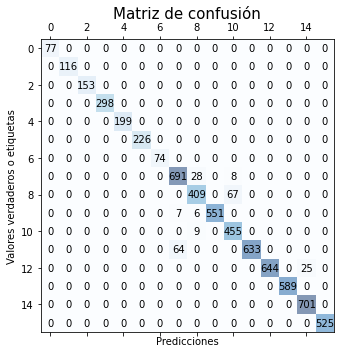

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(mcm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(mcm.shape[0]):
  for j in range(mcm.shape[1]):
      ax.text(x=j, y=i, s=mcm[i, j], va='center', ha='center')

plt.title("Matriz de confusión",fontsize=15)
#plt.title('f model: T= %d' % (t))
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos o etiquetas')

plt.tight_layout()
plt.show()

## **Métrica F1**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.7f' % precision_score(y_true=labels, y_pred=predictions, average='macro'))
print('Recall: %.7f' % recall_score(y_true=labels, y_pred=predictions, average='macro'))
print('F1: %.7f' % f1_score(y_true=labels, y_pred=predictions, average='macro'))

Precision: 0.9772342
Recall: 0.9773805
F1: 0.9767974
